### Description
__author:__ Musa Unal

__date:__ Nov 27 2023

__class:__ ISTA350

__section:__ 001B

__Final Project__

__module_purpose:__ scrape Kaggle dataset using use Selenium; and create three figures from it  
__dataset:__ "World Weather Repository ( Daily Updating )" (https://www.kaggle.com/datasets/nelgiriyewithana/global-weather-repository/data)  
__dataset_author__: Nidula Elgiriyewithana (https://www.kaggle.com/nelgiriyewithana)

__figure_1:__ scatterplot with regression line -- x: temperature (fahrenheit), y: humidity (percent), data: contries all over the world

__figure_2:__ bar chart -- x: precipitation average (inches), y: countries in asia, data: asian capital cities precipitation from August 2023 to now

__figure_3:__ box plot -- x: continents: Asia, Australia, Europe, America, Africa, y: average wind speed, data: wind speed data from countries grouped by continent

__Reason to choose this dataset:__ We chose this topic, because there are many variables we can look into deeper and check different correlations. There are daily weather information for capital cities all around the world. There are also other informations like, timezone, location, latitude, longitude, sunset time and other climate conditions. We can use these variables for climate analysis or tourism planning etc. We need to check general analysis as group and also individually. This dataset offer us many perspective to analyze.

In [ ]:
def get_credentials(filename):
    '''
    Function: get_credentials
        Opens a file which should contain an email and a password to en existing Kaggle account. They should both be on one line, separated by a comma
        This function will return the email and password.

    Parameters:
        filename: (str) The filename

    Returns:
        (tuple) Email and password strings
    '''
    email = ''
    password = ''
    with open(filename) as file:
        line = file.readlines()
        email = line[0].strip()
        password = line[1].strip()
        return email, password

email, password = get_credentials('creds.txt')

In [21]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

In [22]:
# define and get url in Chrome
print('Loading the page ... (1/5)')
url = 'https://www.kaggle.com/datasets/nelgiriyewithana/global-weather-repository/data#?select=GlobalWeatherRepository.csv'
browser = webdriver.Chrome()
browser.get(url)

time.sleep(3)

Loading the page ... (1/5)


In [23]:
# on World Weather Repo page
print('Clicking on "Sign In" button ... (2/5)')
buttons = browser.find_elements(By.TAG_NAME, 'button')  # gets all buttons on page
for button in buttons:  # find button to navigate to initial login page, and click
    if button.text == 'Sign In':
        button.click()
        break

time.sleep(3)

Clicking on "Sign In" button ... (2/5)


In [24]:
# on initial login page
print('Clicking on "Sign In With Email" button ... (3/5)')
sign_in_with_email = browser.find_element(By.XPATH, '//button[.//span[contains(text(), "Sign in with Email")]]')  # find "SignInWithEmail" button
sign_in_with_email.click()  # click!

time.sleep(3)

Clicking on "Sign In With Email" button ... (3/5)


In [25]:
# on "Sign In With Email" page
print('Entering credentials ... (4/5)')
user_field = browser.find_element(By.NAME, 'email')  # define user/email field
pass_field = browser.find_element(By.NAME, 'password')  # define password field
submit_buttons = browser.find_elements(By.TAG_NAME, 'button')  # get buttons
user_field.send_keys(email)  # enter email to field
pass_field.send_keys(password)  # enter password to field
for button in submit_buttons:  # find "Submit" button, and click
    if button.text == 'Sign In':
        button.click()
        break

time.sleep(3)

Entering credentials ... (4/5)


In [26]:
# now back on World Weather Repo page, finally logged in, ready to download
print('Clicking download button ... (5/5)')
download_button = browser.find_element(By.XPATH, "//button[contains(.,'Download')]")  # find "Download" button
download_button.click()  # click!

print('Done!')
print('~~ File was placed in your downloads folder ~~')

Clicking download button ... (5/5)
Done!
~~ File was placed in your downloads folder ~~


In [1]:
import pandas as pd
import zipfile
import os

def get_and_clean_weather_data(zip_path, csv_file_name):
    """
    Extract and read a CSV file from a ZIP archive, then process it to focus on specific weather features.

    Parameters:
    - zip_path (str): The path to the ZIP archive.
    - csv_file_name (str): The name of the CSV file inside the ZIP archive.

    Returns:
    pandas DataFrame: A DataFrame containing the processed weather data.
    """

    # Extract the CSV file from the ZIP archive
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        # List all the contents of the zip file
        zip_contents = zip_ref.namelist()
        
        # Find the full path of the CSV file in the zip
        csv_full_path = next((f for f in zip_contents if f.endswith(csv_file_name)), None)

        if csv_full_path is None:
            raise FileNotFoundError(f"{csv_file_name} not found in the ZIP archive.")
        
        # Extract the CSV file
        zip_ref.extract(csv_full_path, 'extracted_data')

    # Define the columns of interest
    columns_of_interest = [
        'country', 'location_name','temperature_fahrenheit', 'feels_like_fahrenheit', 'humidity', 'wind_mph',
        'pressure_mb', 'precip_in', 'pressure_in', 'timezone',
        'cloud', 'wind_degree', 'gust_mph', 'visibility_miles'
    ]

    # Read the CSV file into a pandas DataFrame
    extracted_csv_path = os.path.join('extracted_data', csv_full_path)
    full_df = pd.read_csv(extracted_csv_path)

    # Extract only the columns of interest
    processed_df = full_df[columns_of_interest]


    return processed_df
# read the file
zip_path = r'C:\Users\mtu10\Downloads\archive.zip'  # Path to your ZIP file
csv_file_name = 'GlobalWeatherRepository.csv'  # Name of the CSV file in the ZIP archive
weather_data = get_and_clean_weather_data(zip_path, csv_file_name)

# Display the first few rows of the processed DataFrame
print(weather_data.head())


       country     location_name  temperature_fahrenheit  \
0  Afghanistan             Kabul                    83.8   
1      Albania            Tirana                    80.6   
2      Algeria           Algiers                    82.4   
3      Andorra  Andorra La Vella                    50.4   
4       Angola            Luanda                    77.0   

   feels_like_fahrenheit  humidity  wind_mph  pressure_mb  precip_in  \
0                   80.1        19       7.2       1004.0        0.0   
1                   82.3        54       3.8       1006.0        0.0   
2                   81.3        30       8.1       1014.0        0.0   
3                   48.0        51       6.0       1015.0        0.0   
4                   80.4        69       2.2       1016.0        0.0   

   pressure_in        timezone  cloud  wind_degree  gust_mph  visibility_miles  
0        29.64      Asia/Kabul      0           74       8.3               6.0  
1        29.71   Europe/Tirane     75       

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import linregress


__FIGURE_1__

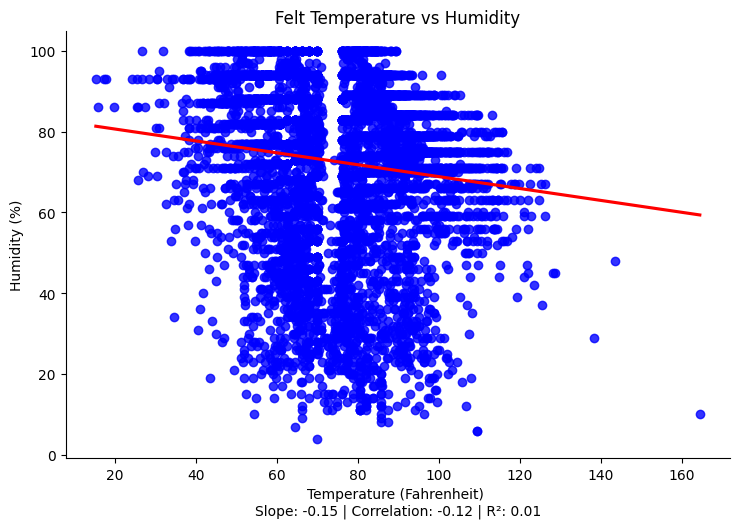

In [3]:
# Calculate the correlation coefficient
corr_coefficient = np.corrcoef(weather_data['feels_like_fahrenheit'], weather_data['humidity'])[0, 1]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(weather_data['feels_like_fahrenheit'], weather_data['humidity'])

# Scatter plot with regression line
sns.lmplot(x='feels_like_fahrenheit', y='humidity', data=weather_data, aspect=1.5, 
           ci=None, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

# customize the plot
plt.title('Felt Temperature vs Humidity')
plt.xlabel(f'Temperature (Fahrenheit) \nSlope: {slope:.2f} | Correlation: {corr_coefficient:.2f} | R²: {r_value**2:.2f}')
plt.ylabel('Humidity (%)')

# Show plot
plt.show()

__X-Axis (Temperature):__ The horizontal axis represents temperature, showing a range from low to high temperatures.
__Y-Axis (Humidity):__ The vertical axis represents humidity levels, ranging from 0% to 100%.
__Dots (Data Points):__ Each blue dot on the plot corresponds to a specific observation of temperature and humidity. The position of a dot on the graph defines the exact values for that observation.
__Red Line (Regression Line):__ This line represents the best-fit linear relationship between temperature and humidity. It shows the general trend of the data. In this case, the line has a negative slope.

__Statistical Indicators:__
__Slope:__ The slope of the regression line is -0.15, indicating that for each unit increase in temperature, the humidity tends to decrease by 0.15 units on average. This is consistent with the negative slope of the red line.

__Correlation (r):__ The correlation coefficient is -0.12, suggesting a very weak negative relationship between temperature and humidity. This means that as temperatures increase, humidity levels tend to decrease slightly, but the relationship is not strong.

__R-Squared (R²):__ The R-squared value is 0.01, which is very low, indicating that only 1% of the variability in humidity can be explained by temperature. This suggests that other factors not shown on this graph may be influencing humidity levels more significantly.

I compared the dataset to see if there is a direct effect between humiditz and temperature, but results show there could more variables effected these two variable.

In [11]:
# outlier = weather_data['feels_like_fahrenheit']
# outlier2 = [row for row in weather_data['feels_like_fahrenheit'] if data > 150]
# print(outlier2)
# Calculate the correlation coefficient
corr_coefficient = np.corrcoef(weather_data['temperature_fahrenheit'], weather_data['humidity'])[0, 1]
print(f"Correlation coefficient: {corr_coefficient}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(weather_data['temperature_fahrenheit'], weather_data['humidity'])
print(f"Linear Regression: slope = {slope}, intercept = {intercept}")

# Print R-squared value
print(f"R-squared: {r_value**2}")


[164.4]
Correlation coefficient: -0.206786029225005
Linear Regression: slope = -0.3484552783835593, intercept = 97.63130089484378
R-squared: 0.042760461882644624


__FIGURE_2__

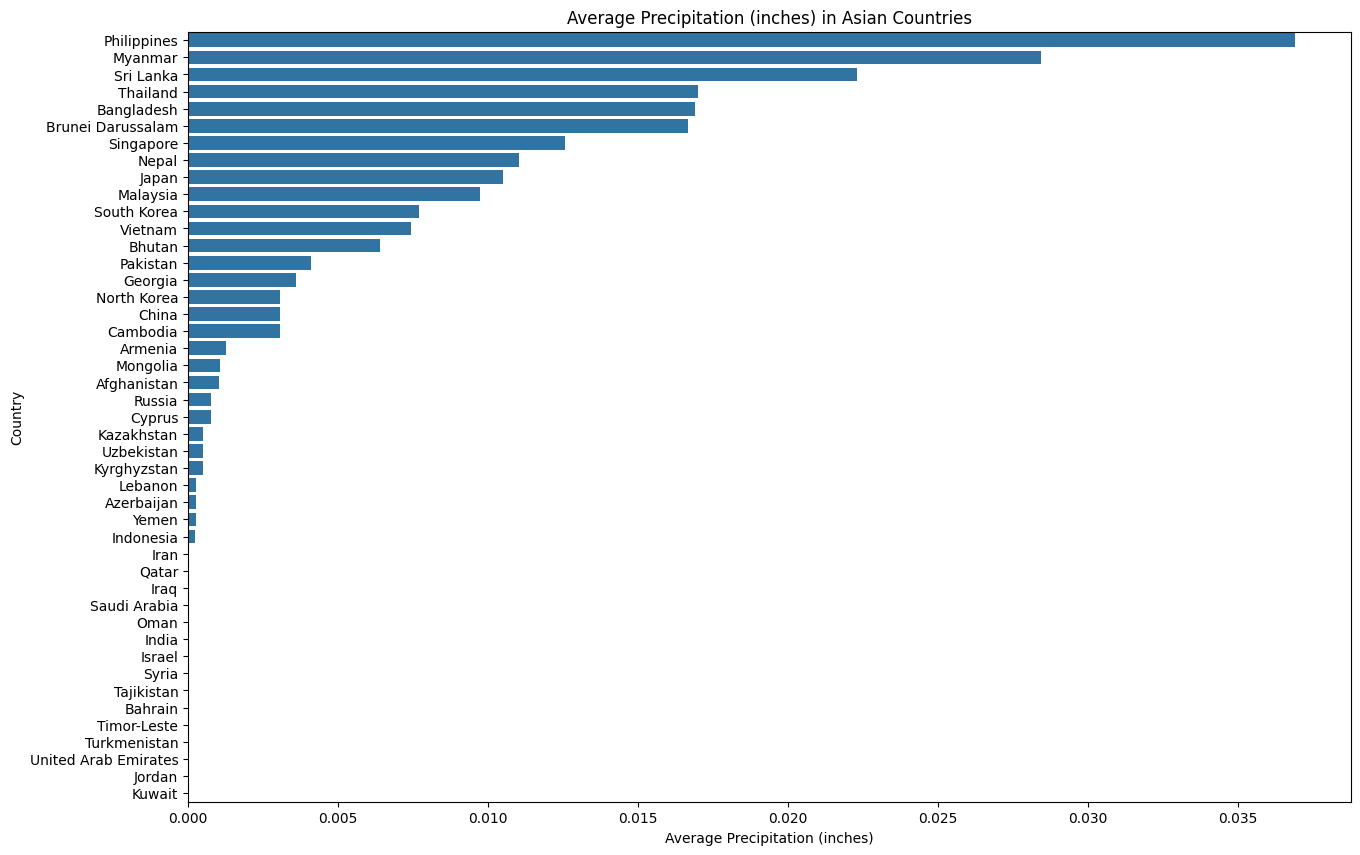

In [35]:
# Filter out Asian countries using the timezone column
asian_weather_data = weather_data[weather_data['timezone'].str.contains('Asia')]

# Group the data by country and calculate the average precipitation
average_precipitation = asian_weather_data.groupby('country')['precip_in'].mean().reset_index()

# Sort the data by average precipitation for better visualization
average_precipitation_sorted = average_precipitation.sort_values('precip_in', ascending=False)

# Barplot of average precipitation by country
plt.figure(figsize=(15, 10))
sns.barplot(x='precip_in', y='country', data=average_precipitation_sorted)

plt.title('Average Precipitation (inches) in Asian Countries')
plt.xlabel('Average Precipitation (inches)')
plt.ylabel('Country')

plt.show()


Length of Bars: The length of the bar correlates to the average precipitation a country has received during the specified period. 
__X axis:__ The x-axis shows the scale of precipitation in inches.
__Y-axis:__ it lists country names sorted from higher precipation to lower

__Recent Data:__ The dataset covers a recent time frame, from August 2023 to now.
__High Average Precipitation:__ Countries like the Philippines are shown to have a high average precipitation, suggesting they have experienced more rainfall in the last few months. This could be due to seasonal monsoons or other climatic factors affecting the region during this period.
__Low Average Precipitation:__ In contrast, countries such as Jordan and the United Arab Emirates have very short bars, indicating low average precipitation. This aligns with what is expected for these regions, which are known for their arid climates.


__FIGURE_3__

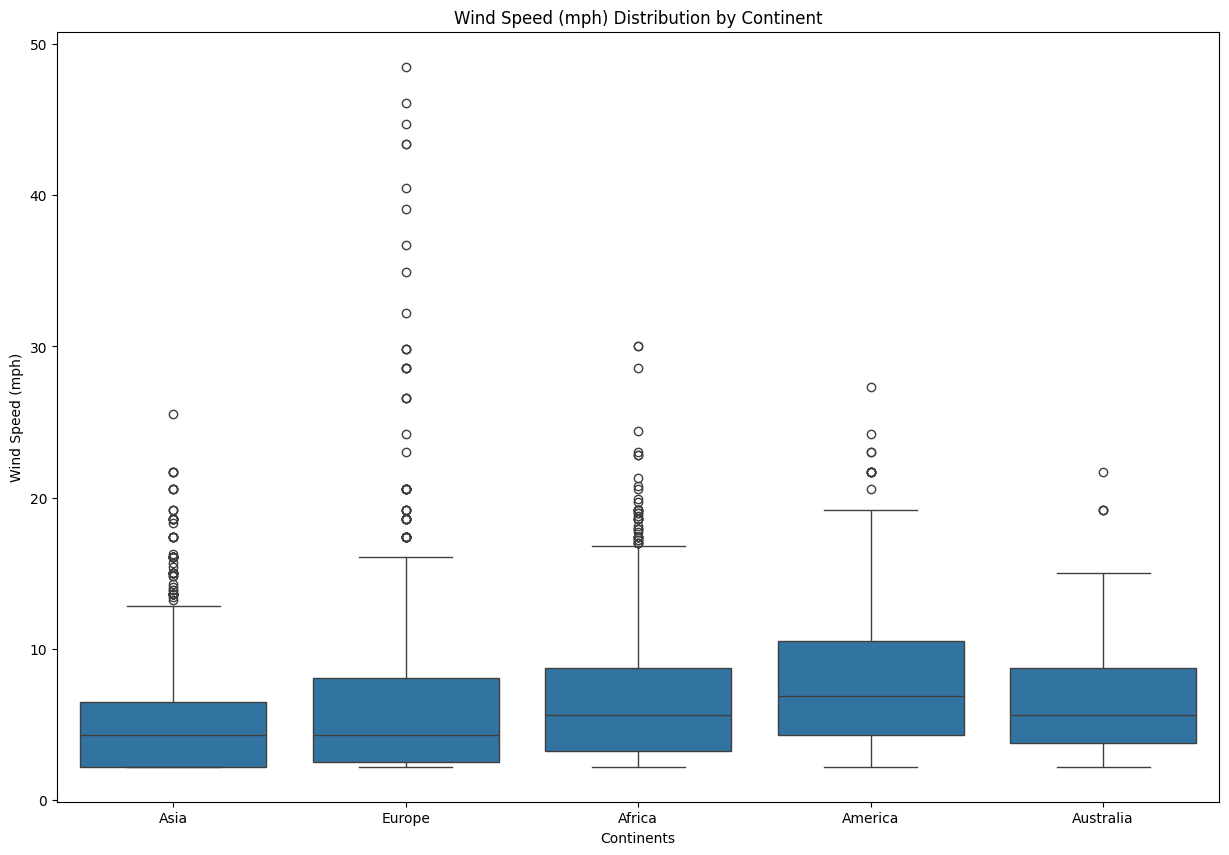

In [36]:
# create continent column from timezone
weather_data['continent'] = weather_data['timezone'].str.split('/').str[0]


# group continents
continents_of_interest = ['Asia', 'Europe', 'Africa', 'America', 'Australia']
weather_data = weather_data[weather_data['continent'].isin(continents_of_interest)]

# Create the boxplot
plt.figure(figsize=(15, 10))
sns.boxplot(x='continent', y='wind_mph', data=weather_data)

plt.title('Wind Speed (mph) Distribution by Continent')
plt.xlabel('Continents')
plt.ylabel('Wind Speed (mph)')

plt.show()


__Boxes:__ The central rectangle in each boxplot represents the middle 50% of the data for that continent, known as the interquartile range (IQR). The bottom and top of the box are the first quartile (25th percentile) and third quartile (75th percentile), respectively.

__Median Lines:__ Inside each box, the horizontal line represents the median wind speed for the continent. The median is the value that separates the higher half from the lower half of the data.

__Whiskers:__ The vertical lines extending from the boxes, called whiskers, indicate the range of the data, extending to 1.5 times the IQR from the bottom and top of the box. Data points beyond the whiskers are generally considered outliers.

__Outliers:__ The individual dots outside the whiskers are outliers. These represent wind speed observations that lie outside the typical range for that continent.

__Interpretation of Results:__
__Asia:__ Shows a relatively narrow IQR, indicating that wind speeds in Asia tend to be more consistent. The median line is towards the bottom of the box, suggesting that most of the days experience lower wind speeds.
__Europe:__ Similar to Asia, Europe has a narrow IQR, with a slightly higher median wind speed. Outliers indicate occasional days with very high wind speeds.
__Africa:__ Demonstrates a broader IQR, implying more variability in wind speeds across the continent. The median is in the middle of the box, suggesting a more even distribution of lower and higher wind speeds.
__America:__ Has a similar pattern to Africa, with a wide IQR and a median that's centrally located within the box. This indicates a balanced distribution of wind speeds, with numerous outliers showing that high wind speeds are not uncommon.
__Australia:__ Shows the widest IQR, suggesting the most significant variability in wind speeds of all the continents shown. The median is lower in the box, indicating that, while variability is high, more days have lower wind speeds than higher ones.